In [89]:
# importing necessary files
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

In [90]:
#reading the csv file into a dataframe called "customer_data"
customer_data=pd.read_csv("marketing_campaign.csv", sep="\t")
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [91]:
# Drop rows with null values
customer_data.dropna(inplace=True)

# Check for any remaining null values
customer_data.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [92]:
print("Number of data-points after removing the rows with missing values:", len(customer_data))

Number of data-points after removing the rows with missing values: 2216


In [93]:
customer_data=customer_data.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [94]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   int64 

In [95]:
customer_data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'],
      dtype='object')

In [96]:
# Getting list of categorical variables
## variable categorical_variable contains the names of coulmns whose data type is object
cat_var = (customer_data.dtypes == 'object')
categorical_variable = list(cat_var[cat_var].index)

print("Categorical variables in the dataset:", categorical_variable)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [97]:
print('Before label encoding')
print(customer_data[['Education', 'Marital_Status']])

# Label Encoding the object dtypes.
LE=LabelEncoder()
for i in  categorical_variable:
    customer_data[i]=customer_data[[i]].apply(LE.fit_transform)


print('After label encoding')
print(customer_data[['Education', 'Marital_Status']])

Before label encoding
       Education Marital_Status
0     Graduation         Single
1     Graduation         Single
2     Graduation       Together
3     Graduation       Together
4            PhD        Married
...          ...            ...
2235  Graduation        Married
2236         PhD       Together
2237  Graduation       Divorced
2238      Master       Together
2239         PhD        Married

[2216 rows x 2 columns]
After label encoding
      Education  Marital_Status
0             2               4
1             2               4
2             2               5
3             2               5
4             4               3
...         ...             ...
2235          2               3
2236          4               5
2237          2               2
2238          3               5
2239          4               3

[2216 rows x 2 columns]


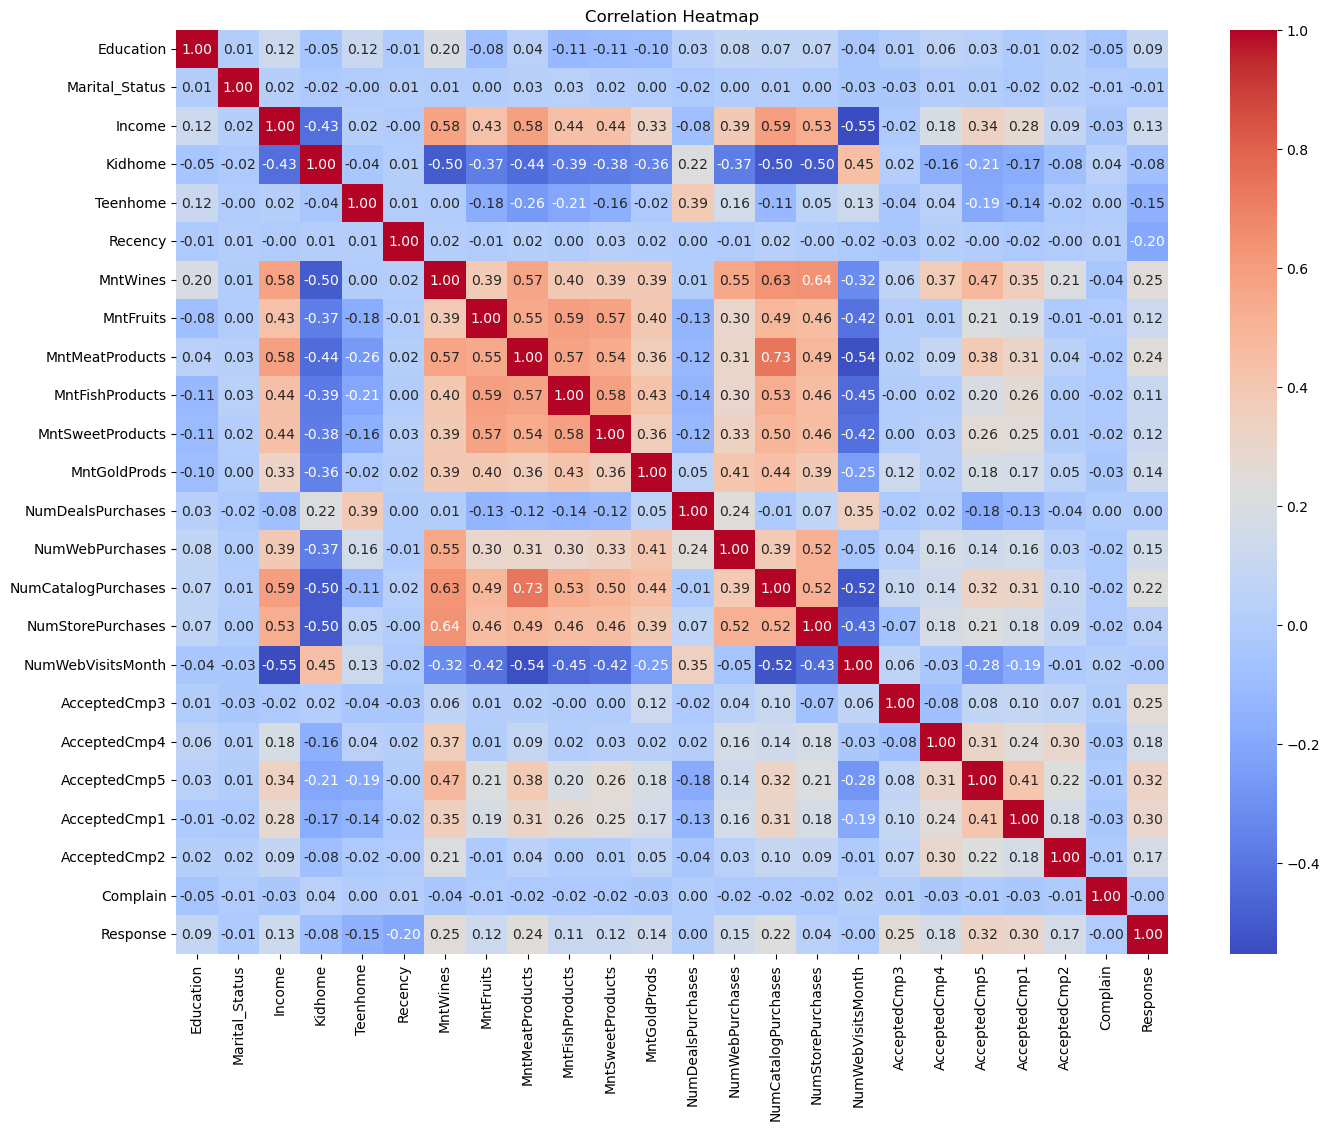

In [98]:
#plotting the heatmap to see the correlations
plt.figure(figsize=(16,12))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [99]:
# Compute correlations
correlations = customer_data.corr()['Response']
print(correlations)

Education              0.090806
Marital_Status        -0.012641
Income                 0.133047
Kidhome               -0.077909
Teenhome              -0.153901
Recency               -0.199766
MntWines               0.246299
MntFruits              0.122443
MntMeatProducts        0.237746
MntFishProducts        0.108145
MntSweetProducts       0.116170
MntGoldProds           0.140332
NumDealsPurchases      0.003451
NumWebPurchases        0.151431
NumCatalogPurchases    0.219914
NumStorePurchases      0.036241
NumWebVisitsMonth     -0.002209
AcceptedCmp3           0.254005
AcceptedCmp4           0.180205
AcceptedCmp5           0.323374
AcceptedCmp1           0.297345
AcceptedCmp2           0.169294
Complain              -0.002029
Response               1.000000
Name: Response, dtype: float64


In [100]:
# lets remove less correlated columns
customer_data_reduced = customer_data.drop(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumStorePurchases', 'MntFishProducts', 'MntSweetProducts', 'NumWebVisitsMonth', 'Complain'], axis=1)

In [101]:
correlations = customer_data_reduced.corr()['Response']
print(correlations)

Income                 0.133047
Recency               -0.199766
MntWines               0.246299
MntFruits              0.122443
MntMeatProducts        0.237746
MntGoldProds           0.140332
NumWebPurchases        0.151431
NumCatalogPurchases    0.219914
AcceptedCmp3           0.254005
AcceptedCmp4           0.180205
AcceptedCmp5           0.323374
AcceptedCmp1           0.297345
AcceptedCmp2           0.169294
Response               1.000000
Name: Response, dtype: float64


In [102]:
customer_data_reduced.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'],
      dtype='object')

In [103]:
customer_data_reduced=pd.DataFrame(customer_data_reduced)

In [104]:
customer_data_reduced

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,58138.0,58,635,88,546,88,8,10,0,0,0,0,0,1
1,46344.0,38,11,1,6,6,1,1,0,0,0,0,0,0
2,71613.0,26,426,49,127,42,8,2,0,0,0,0,0,0
3,26646.0,26,11,4,20,5,2,0,0,0,0,0,0,0
4,58293.0,94,173,43,118,15,5,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,247,9,3,0,0,0,0,0,0
2236,64014.0,56,406,0,30,8,8,2,0,0,0,1,0,0
2237,56981.0,91,908,48,217,24,2,3,0,1,0,0,0,0
2238,69245.0,8,428,30,214,61,6,5,0,0,0,0,0,0


In [105]:
customer_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Recency              2216 non-null   int64  
 2   MntWines             2216 non-null   int64  
 3   MntFruits            2216 non-null   int64  
 4   MntMeatProducts      2216 non-null   int64  
 5   MntGoldProds         2216 non-null   int64  
 6   NumWebPurchases      2216 non-null   int64  
 7   NumCatalogPurchases  2216 non-null   int64  
 8   AcceptedCmp3         2216 non-null   int64  
 9   AcceptedCmp4         2216 non-null   int64  
 10  AcceptedCmp5         2216 non-null   int64  
 11  AcceptedCmp1         2216 non-null   int64  
 12  AcceptedCmp2         2216 non-null   int64  
 13  Response             2216 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 259.7 KB


In [106]:
customer_data_reduced.dtypes

Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntGoldProds             int64
NumWebPurchases          int64
NumCatalogPurchases      int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
dtype: object

Text(0.5, 1.0, "Boxplot 'Income'")

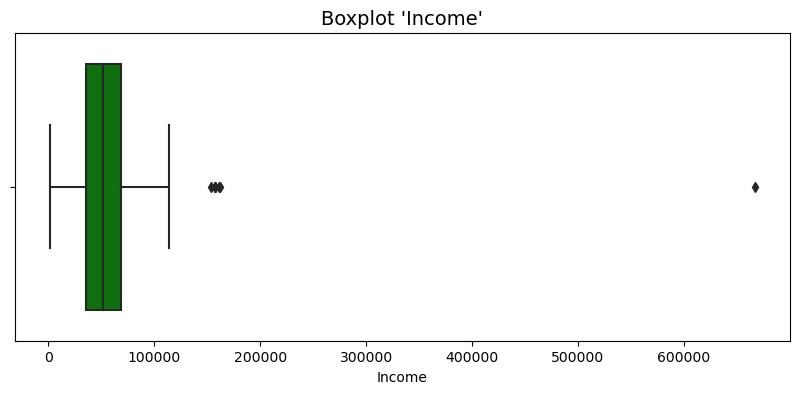

In [107]:
# Check outlier
plt.figure(figsize=(10,4))
sns.boxplot(data=customer_data,x='Income',color='g')
plt.title("Boxplot 'Income'",size=14)

In [108]:
# #calculating the first quantile
# q1=customer_data_reduced.quantile(0.25)

# #calculating the third quantile
# q3=customer_data_reduced.quantile(0.75)
# print(q1)
# print(q3)

# # Calculate the interquartile range (IQR) for each feature
# iqr=q3-q1
# print(iqr)

In [109]:
# # Remove outliers based on the interquartile range (IQR)
# dataset=customer_data_reduced[~((customer_data_reduced<(q1-1.5*iqr)) | (customer_data_reduced > (q3 + 1.5*iqr))).any(axis=1)]
# dataset

In [110]:
#splitting the data into features and target variable
X=customer_data_reduced.drop(columns=['Response'])
y=customer_data_reduced['Response']

In [111]:
scaler=StandardScaler()

X=scaler.fit_transform(X)

file_path = r'C:\Users\kusha\OneDrive\Desktop\Python_Workspace_Evaluations\Weekly_Assignment_8\ml_deployment\datafiles\scaler_file.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved as Scaler_file.pkl")

Scaler saved as Scaler_file.pkl


In [112]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [113]:
# Initializing the logistic regression model with parameter
logistic_regression_model=LogisticRegression(max_iter=3000)

#training the logistic_regression_model
logistic_regression_model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [114]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction=logistic_regression_model.predict(X_test)
training_prediction=logistic_regression_model.predict(X_train)

In [115]:
print("Accuracy score of our model on testing data: ",accuracy_score(y_test,testing_prediction))

Accuracy score of our model on testing data:  0.8918918918918919


In [116]:
#Classification report of our model
print(classification_report(y_test,testing_prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       385
           1       0.74      0.29      0.41        59

    accuracy                           0.89       444
   macro avg       0.82      0.64      0.68       444
weighted avg       0.88      0.89      0.87       444



In [117]:
# Initializing the support_vector_regressor_model with parameter kernel='linear'
support_vector_classification_model=SVC()

#training the support_vector_regressor_model
support_vector_classification_model.fit(X_train,y_train)

SVC()

In [118]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_svc_model=support_vector_classification_model.predict(X_test)
training_prediction_svc_model=support_vector_classification_model.predict(X_train)

In [119]:
print("Accuracy score of our model on testing data: ",accuracy_score(y_test,testing_prediction_svc_model))

Accuracy score of our model on testing data:  0.8918918918918919


In [120]:
#Classification report of our model
print(classification_report(y_test,testing_prediction_svc_model))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       385
           1       0.74      0.29      0.41        59

    accuracy                           0.89       444
   macro avg       0.82      0.64      0.68       444
weighted avg       0.88      0.89      0.87       444



In [121]:
# Initializing the logistic regression model
random_forest_classification_model=RandomForestClassifier()

#training the support_vector_regressor_model
random_forest_classification_model.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_rfc_model=random_forest_classification_model.predict(X_test)
training_prediction_rfc_model=random_forest_classification_model.predict(X_train)

In [123]:
print("Accuracy score of our model on testing data: ",accuracy_score(y_test,testing_prediction_rfc_model))

Accuracy score of our model on testing data:  0.8873873873873874


In [124]:
# Initializing the KNeighborsClassifier model
knn_model=KNeighborsClassifier()

#training the support_vector_regressor_model
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [125]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_knn_model=knn_model.predict(X_test)
training_prediction_knn_model=knn_model.predict(X_train)

In [126]:
print("Accuracy score of our model on testing data: ",accuracy_score(y_test,testing_prediction_knn_model))

Accuracy score of our model on testing data:  0.8626126126126126


In [127]:
file_path = r'C:\Users\kusha\OneDrive\Desktop\Python_Workspace_Evaluations\Weekly_Assignment_8\ml_deployment\datafiles\svc_model_file.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(support_vector_classification_model, file)